<a href="https://colab.research.google.com/github/ArthurChan-1111/Bitcoin_prediction/blob/main/Master_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [ ]:
!pip install pandas_ta
!pip install numpy==1.23.5
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.9/294.9 kB 19.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for building linear regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import summary_table, OLSInfluence
from statsmodels.regression.linear_model import OLSResults
from statsmodels.stats.stattools import durbin_watson as dwtest
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

from scipy import stats
from scipy.stats import zscore

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score

import pylab as py

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)


In [ ]:
!git clone https://github.com/ArthurChan-1111/Bitcoin_prediction.git

%cd Bitcoin_prediction

%pip install pandas_ta

import pandas as pd
import pandas_ta as ta
import csv
import numpy as np

btc_data = pd.read_csv('Bitcoin Historical Data.csv', on_bad_lines='skip', lineterminator='\n')
btc_data.tail(5)

c:\Users\user\OneDrive\桌面\DSBS\STAT5102\Project\Bitcoin_prediction-1\Bitcoin_prediction\Bitcoin_prediction


fatal: destination path 'Bitcoin_prediction' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Date,Price,Open,High,Low,Vol. ('000),Change %\r
4107,1/5/2014,1014.7,924.7,1029.9,911.4,21.37,9.74%\r
4108,1/4/2014,924.7,884.3,932.2,848.3,14.24,4.57%\r
4109,1/3/2014,884.3,856.9,888.2,839.4,9.71,3.19%\r
4110,1/2/2014,856.9,815.9,886.2,810.5,12.81,5.02%\r
4111,1/1/2014,815.9,805.9,829.9,771.0,10.76,1.24%


In [ ]:
# Convert the dictionary to a DataFrame
btc_data = pd.DataFrame(btc_data)

# Parse the "Date" column into datetime format
btc_data["Date"] = pd.to_datetime(btc_data["Date"], format="%m/%d/%Y")

# Sort the data by date in ascending order
btc_data.sort_values(by="Date", ascending=True, inplace=True)


#Data Preprocessing

In [ ]:
#Function to clean and convert volume data
def clean_volume(volume):
    if isinstance(volume, str):  # Check if the value is a string
        volume = volume.replace(',', '')  # Remove commas
        if 'B' in volume:  # If the value contains 'B' (billions)
            return float(volume.replace('B', '')) * 1_000_000_000
        elif 'M' in volume:  # If the value contains 'M' (millions)
            return float(volume.replace('M', '')) * 1_000_000
        elif 'K' in volume:  # If the value contains 'K' (thousands)
            return float(volume.replace('K', '')) * 1_000
        else:  # If no suffix is present, convert to float directly
            return float(volume)
    return np.nan  # Handle unexpected cases

# Apply the cleaning function to the volume column
btc_data["Volume"] = btc_data["Vol. ('000)"].apply(clean_volume)
btc_data = btc_data.drop("Vol. ('000)", axis=1)

# 4. Remove '%' from "Change %" and convert to numeric
btc_data.rename(columns={"Change %\r": "Change"}, inplace=True)
btc_data["Change"] = btc_data["Change"].str.replace("%", "").str.strip().astype(float)

In [ ]:
# Day of the week (0=Monday, 6=Sunday)
btc_data["Day_of_Week"] = btc_data["Date"].dt.dayofweek

# Week of the year
btc_data["Week_of_Year"] = btc_data["Date"].dt.isocalendar().week

# Month of the year
btc_data["Month"] = btc_data["Date"].dt.month

# Quarter of the year
btc_data["Quarter"] = btc_data["Date"].dt.quarter

# Year
btc_data["Year"] = btc_data["Date"].dt.year

In [ ]:
# Calculate RSI, EMA, SMA, and MACD
btc_data["RSI_6"] = ta.rsi(btc_data["Price"], length=6)  # Relative Strength Index
btc_data["RSI_12"] = ta.rsi(btc_data["Price"], length=12)  # Relative Strength Index
btc_data["EMA_14"] = ta.ema(btc_data["Price"], length=14)  # Exponential Moving Average
btc_data["SMA_14"] = ta.sma(btc_data["Price"], length=14)  # Simple Moving Average

# Add On-Balance Volume (OBV)
btc_data["OBV"] = ta.obv(btc_data["Price"], btc_data["Volume"])

# Calculate MACD --------------------------------------------------------------------------------------
macd = ta.macd(btc_data["Price"], fast=12, slow=26, signal=9)
btc_data["MACD"] = macd["MACD_12_26_9"]
btc_data["MACD_Signal"] = macd["MACDs_12_26_9"]
btc_data["MACD_Hist"] = macd["MACDh_12_26_9"]

# Create MACD_buy: 1 if MACD crosses above MACD_Signal, otherwise 0
btc_data["MACD_buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["MACD"] > btc_data["MACD_Signal"]) &  # MACD is above Signal
    (btc_data["MACD"].shift(1) <= btc_data["MACD_Signal"].shift(1)),  # Previous MACD was below or equal to Signal
    "MACD_buy"] = 1  # Buy signal

# Create MACD_sell: 1 if MACD crosses below MACD_Signal, otherwise 0
btc_data["MACD_sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["MACD"] <= btc_data["MACD_Signal"]) &  # MACD is below or equal to Signal
    (btc_data["MACD"].shift(1) > btc_data["MACD_Signal"].shift(1)),  # Previous MACD was above Signal
    "MACD_sell"] = 1  # Sell signal

# Calculate Bollinger Bands --------------------------------------------------------------------------------------
bbands = ta.bbands(btc_data["Price"], length=20, std=2)
btc_data["BB_Lower"] = bbands["BBL_20_2.0"]  # Lower Band
btc_data["BB_Middle"] = bbands["BBM_20_2.0"]  # Middle Band
btc_data["BB_Upper"] = bbands["BBU_20_2.0"]  # Upper Band

# Create BB_Buy: 1 if Price crosses below the Lower Band, otherwise 0
btc_data["BB_Buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["Price"] < btc_data["BB_Lower"]) &  # Price is below the Lower Band
    (btc_data["Price"].shift(1) >= btc_data["BB_Lower"].shift(1)),  # Previous Price was above or equal to Lower Band
    "BB_Buy"] = 1  # Buy signal

# Create BB_Sell: 1 if Price crosses above the Upper Band, otherwise 0
btc_data["BB_Sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["Price"] > btc_data["BB_Upper"]) &  # Price is above the Upper Band
    (btc_data["Price"].shift(1) <= btc_data["BB_Upper"].shift(1)),  # Previous Price was below or equal to Upper Band
    "BB_Sell"] = 1  # Sell signal

# Calculate ATR --------------------------------------------------------------------------------------
btc_data["ATR"] = ta.atr(btc_data["High"], btc_data["Low"], btc_data["Price"], length=14)

# Set Stop-Loss Levels (Example with Long Trade)
atr_multiplier = 2
btc_data["Stop_Loss_Long"] = btc_data["Price"] - (btc_data["ATR"] * atr_multiplier) #Stop-Loss for Buy (Long) Trade
btc_data["Stop_Loss_Short"] = btc_data["Price"] + (btc_data["ATR"] * atr_multiplier) #Stop-Loss for Sell (Short) Trade

# Calculate VWAP --------------------------------------------------------------------------------------
btc_data.set_index("Date", inplace=True) # Set the "Date" column as the index
btc_data["VWAP"] = ta.vwap(btc_data["High"], btc_data["Low"], btc_data["Price"], btc_data["Volume"])

# Create VWAP_Buy: 1 if Price crosses above VWAP, otherwise 0
btc_data["VWAP_Buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["Price"] > btc_data["VWAP"]) &  # Price is above VWAP
    (btc_data["Price"].shift(1) <= btc_data["VWAP"].shift(1)),  # Previous Price was below or equal to VWAP
    "VWAP_Buy"] = 1  # Buy signal

# Create VWAP_Sell: 1 if Price crosses below VWAP, otherwise 0
btc_data["VWAP_Sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["Price"] < btc_data["VWAP"]) &  # Price is below VWAP
    (btc_data["Price"].shift(1) >= btc_data["VWAP"].shift(1)),  # Previous Price was above or equal to VWAP
    "VWAP_Sell"] = 1  # Sell signal

# Fear and greed index
fear_and_greed_index = pd.read_csv('fear_and_greed_index.csv')
# rename the date column in fear_and_greed_index to Date
fear_and_greed_index.rename(columns={"date": "Date", "value": "Fear_and_Greed_Index"}, inplace=True)
# convert the date column to datetime
fear_and_greed_index["Date"] = pd.to_datetime(fear_and_greed_index["Date"], format="%Y-%m-%d")
# dropping the timestamp, value_classification, time_until_update columns
fear_and_greed_index.drop(columns=["timestamp", "value_classification", "time_until_update"], inplace=True)
fear_and_greed_index.head()

# Join the two dataframes on the "Date" column, dropping
btc_data = btc_data.merge(fear_and_greed_index, on="Date", how="left")
btc_data.head(20)

# Support and Resistance Levels
btc_data["Support"] = btc_data["Low"].rolling(window=20).min()  # Lowest low in the past 20 days
btc_data["Resistance"] = btc_data["High"].rolling(window=20).max()  # Highest high in the past 20 days

# normalize the Fear_and_Greed_Index column
btc_data["Fear_and_Greed_Index"] = (btc_data["Fear_and_Greed_Index"] - btc_data["Fear_and_Greed_Index"].min()) / (btc_data["Fear_and_Greed_Index"].max() - btc_data["Fear_and_Greed_Index"].min())
btc_data.describe().T

# Add two columns for extreme fear and extreme greed
btc_data["Extreme_Fear"] = np.where(btc_data["Fear_and_Greed_Index"] < 0.2, 1, 0)
btc_data["Extreme_Greed"] = np.where(btc_data["Fear_and_Greed_Index"] > 0.8, 1, 0)
btc_data.describe().T

# Use 70 in RSI to classify overbought and 30 to classify oversold
btc_data["RSI_12_Overbought"] = np.where(btc_data["RSI_12"] > 70, 1, 0)
btc_data["RSI_12_Oversold"] = np.where(btc_data["RSI_12"] < 30, 1, 0)
btc_data.describe().T

# Adding RSI_6 greater than RSI_12 to show bullish divergence and conversely
btc_data["RSI_Bullish_Divergence"] = np.where(btc_data["RSI_6"] > btc_data["RSI_12"], 1, 0)
btc_data["RSI_Bearish_Divergence"] = np.where(btc_data["RSI_6"] < btc_data["RSI_12"], 1, 0)
btc_data.describe().T

# Display the first few rows of the data with calculated indicators
btc_data.tail(20)

,Date,Price,Open,High,Low,Change,Volume,Day_of_Week,Week_of_Year,Month,...,VWAP_Sell,Fear_and_Greed_Index,Support,Resistance,Extreme_Fear,Extreme_Greed,RSI_12_Overbought,RSI_12_Oversold,RSI_Bullish_Divergence,RSI_Bearish_Divergence
4092,2025-03-17,84019.1,82580.3,84729.2,82525.0,1.74,58.04,0,12,3,...,0,0.300000,76677.1,94986.5,0,0,0,0,1,0
4093,2025-03-18,82719.1,84019.1,84019.1,81171.3,-1.55,58.17,1,12,3,...,0,0.322222,76677.1,94986.5,0,0,0,0,1,0
4094,2025-03-19,86841.0,82719.1,86990.6,82557.5,4.98,84.61,2,12,3,...,0,0.300000,76677.1,94986.5,0,0,0,0,1,0
4095,2025-03-20,84208.1,86841.3,87419.0,83656.1,-3.03,69.86,3,12,3,...,1,0.488889,76677.1,94986.5,0,0,0,0,1,0
4096,2025-03-21,84073.3,84208.7,84831.0,83215.9,-0.16,42.80,4,12,3,...,0,0.288889,76677.1,94986.5,0,0,0,0,1,0
4097,2025-03-22,83840.5,84076.6,84526.3,83688.2,-0.28,20.84,5,12,3,...,1,0.300000,76677.1,94266.1,0,0,0,0,1,0
4098,2025-03-23,86077.4,83840.2,86082.0,83812.7,2.67,31.13,6,12,3,...,0,0.277778,76677.1,92802.0,0,0,0,0,1,0
4099,2025-03-24,87490.0,86076.1,88740.2,85541.6,1.64,95.71,0,13,3,...,0,0.444444,76677.1,92802.0,0,0,0,0,1,0
4100,2025-03-25,87404.0,87495.3,88523.3,86328.5,-0.10,75.24,1,13,3,...,1,0.455556,76677.1,92802.0,0,0,0,0,1,0
4101,2025-03-26,86912.0,87349.8,88276.7,85866.4,-0.56,62.04,2,13,3,...,0,0.466667,76677.1,91059.8,0,0,0,0,1,0


In [ ]:
# Calculate the percentage price change over the next 7 days (Target Variable for Regression)
btc_data["Pct_Change"] = ((btc_data["Price"].shift(-7) - btc_data["Price"]) / btc_data["Price"]) * 100

In [ ]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    4112 non-null   datetime64[ns]
 1   Price                   4112 non-null   float64       
 2   Open                    4112 non-null   float64       
 3   High                    4112 non-null   float64       
 4   Low                     4112 non-null   float64       
 5   Change                  4112 non-null   float64       
 6   Volume                  4112 non-null   float64       
 7   Day_of_Week             4112 non-null   int32         
 8   Week_of_Year            4112 non-null   UInt32        
 9   Month                   4112 non-null   int32         
 10  Quarter                 4112 non-null   int32         
 11  Year                    4112 non-null   int32         
 12  RSI_6                   4106 non-null   float64 

# **Re-scale and Transformation**

**Yeo-Johnson Transformation** for Price, Change, Pct_Change

In [ ]:
# For Price, Change, Pct_Change (use yeo-johnson)
from sklearn.preprocessing import PowerTransformer
import pandas as pd
# Initialize PowerTransformer for each column
power_transformer_price = PowerTransformer(method='yeo-johnson', standardize=False)  # Disable standardization here
power_transformer_change = PowerTransformer(method='yeo-johnson', standardize=False)
power_transformer_pct_change = PowerTransformer(method='yeo-johnson', standardize=False)

# Apply the Yeo-Johnson transformation to "Price"
btc_data['YeoJohnson_Price'] = power_transformer_price.fit_transform(btc_data[['Price']])
btc_data['YeoJohnson_Change'] = power_transformer_change.fit_transform(btc_data[['Change']])
btc_data['YeoJohnson_Pct_Change'] = power_transformer_pct_change.fit_transform(btc_data[['Pct_Change']])

# Store lambda values for each column
lambdas = {
    'Price_lambda': power_transformer_price.lambdas_[0],
    'Change_lambda': power_transformer_change.lambdas_[0],
    'Pct_Change_lambda': power_transformer_pct_change.lambdas_[0]}

# Calculate mean and standard deviation for each transformed column
transformed_means = {
    'Price_mean': btc_data['YeoJohnson_Price'].mean(),
    'Change_mean': btc_data['YeoJohnson_Change'].mean(),
    'Pct_Change_mean': btc_data['YeoJohnson_Pct_Change'].mean()}

transformed_stds = {
    'Price_std': btc_data['YeoJohnson_Price'].std(),
    'Change_std': btc_data['YeoJohnson_Change'].std(),
    'Pct_Change_std': btc_data['YeoJohnson_Pct_Change'].std()}

# Print the collected lambdas, means, and standard deviations
print(f"Lambdas: {lambdas}")
print(f"Means: {transformed_means}")
print(f"Standard Deviations: {transformed_stds}")

### Step 2: Back-Transformation ###
# Recreate PowerTransformers with stored lambdas for back-transformation
power_transformer_price.lambdas_ = [lambdas['Price_lambda']]
power_transformer_change.lambdas_ = [lambdas['Change_lambda']]
power_transformer_pct_change.lambdas_ = [lambdas['Pct_Change_lambda']]

Lambdas: {'Price_lambda': 0.14010275610694164, 'Change_lambda': 0.8205229400088366, 'Pct_Change_lambda': 0.8509874190934532}
Means: {'Price_mean': 17.919095292940135, 'Change_mean': -0.3119563265517425, 'Pct_Change_mean': -0.5122816173629563}
Standard Deviations: {'Price_std': 6.273488664045835, 'Change_std': 5.106427645661091, 'Pct_Change_std': 12.487698933474633}


In [ ]:
numerical_variable = btc_data.select_dtypes(include=['number'])
btc_data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change', 'Volume',
       'Day_of_Week', 'Week_of_Year', 'Month', 'Quarter', 'Year', 'RSI_6',
       'RSI_12', 'EMA_14', 'SMA_14', 'OBV', 'MACD', 'MACD_Signal', 'MACD_Hist',
       'MACD_buy', 'MACD_sell', 'BB_Lower', 'BB_Middle', 'BB_Upper', 'BB_Buy',
       'BB_Sell', 'ATR', 'Stop_Loss_Long', 'Stop_Loss_Short', 'VWAP',
       'VWAP_Buy', 'VWAP_Sell', 'Fear_and_Greed_Index', 'Support',
       'Resistance', 'Extreme_Fear', 'Extreme_Greed', 'RSI_12_Overbought',
       'RSI_12_Oversold', 'RSI_Bullish_Divergence', 'RSI_Bearish_Divergence',
       'Pct_Change', 'YeoJohnson_Price', 'YeoJohnson_Change',
       'YeoJohnson_Pct_Change'],
      dtype='object')

**Standardize all numeric variable**

store to scaled_btc_data

In [ ]:
#Standardize all numeric variable
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# List of features for scaling
numeric_features = ['Price', 'Open', 'High', 'Low', 'Change', 'Volume', 'RSI_6', 'RSI_12', 'EMA_14',
       'SMA_14', 'OBV', 'MACD', 'MACD_Signal', 'MACD_Hist',
       'BB_Lower', 'BB_Middle', 'BB_Upper',
       'ATR', 'Stop_Loss_Long', 'Stop_Loss_Short', 'VWAP', 'Support', 'Resistance', 'Pct_Change', 'Fear_and_Greed_Index',
                    'YeoJohnson_Price', 'YeoJohnson_Change', 'YeoJohnson_Pct_Change']

# Fit and transform only the numeric features
scaled_features = standard_scaler.fit_transform(btc_data[numeric_features])

# Create a new DataFrame for scaled data
scaled_btc_data = btc_data.copy()  # Copy original DataFrame

# Replace numeric columns in the new DataFrame with scaled values
scaled_btc_data[numeric_features] = scaled_features

scaled_btc_data.tail()

,Date,Price,Open,High,Low,Change,Volume,Day_of_Week,Week_of_Year,Month,...,Extreme_Fear,Extreme_Greed,RSI_12_Overbought,RSI_12_Oversold,RSI_Bullish_Divergence,RSI_Bearish_Divergence,Pct_Change,YeoJohnson_Price,YeoJohnson_Change,YeoJohnson_Pct_Change
4107,2025-04-01,2.671534,2.566960,2.614052,2.641719,0.426647,-0.08711,1,14,4,...,0,0,0,0,1,0,NaN,1.588100,0.592739,NaN
4108,2025-04-02,2.563246,2.674435,2.729494,2.638488,-0.489722,-0.08711,2,14,4,...,0,0,0,0,0,1,NaN,1.563532,-0.649871,NaN
4109,2025-04-03,2.589276,2.565893,2.549828,2.594588,0.075884,-0.08711,3,14,4,...,0,0,0,0,0,1,NaN,1.569499,0.203743,NaN
4110,2025-04-04,2.618297,2.592074,2.581801,2.610437,0.087576,-0.08711,4,14,4,...,0,0,0,0,1,0,NaN,1.576105,0.217829,NaN
4111,2025-04-05,2.605388,2.621466,2.563514,2.639559,-0.092190,-0.08711,5,14,4,...,0,0,0,0,1,0,NaN,1.573172,-0.015639,NaN


pct_change -> nan?

# **Please use scaled_btc_data for analysis**

# Back Transformation After prediction (for interpretation)

In [ ]:
# Recreate PowerTransformers with stored lambdas for back-transformation
power_transformer_price.lambdas_ = [lambdas['Price_lambda']]
power_transformer_change.lambdas_ = [lambdas['Change_lambda']]
power_transformer_pct_change.lambdas_ = [lambdas['Pct_Change_lambda']]

# Step 1: De-standardize the standardized values to get Yeo-Johnson transformed values
scaled_btc_data['YeoJohnson_Price_Back'] = (
    scaled_btc_data['YeoJohnson_Price'] * transformed_stds['Price_std']
) + transformed_means['Price_mean']

scaled_btc_data['YeoJohnson_Change_Back'] = (
    scaled_btc_data['YeoJohnson_Change'] * transformed_stds['Change_std']
) + transformed_means['Change_mean']

scaled_btc_data['YeoJohnson_Pct_Change_Back'] = (
    scaled_btc_data['YeoJohnson_Pct_Change'] * transformed_stds['Pct_Change_std']
) + transformed_means['Pct_Change_mean']

# Step 2: Create temporary DataFrames with the exact column names used during fit
price_back_df = scaled_btc_data[['YeoJohnson_Price_Back']].rename(columns={'YeoJohnson_Price_Back': 'Price'})
change_back_df = scaled_btc_data[['YeoJohnson_Change_Back']].rename(columns={'YeoJohnson_Change_Back': 'Change'})
pct_change_back_df = scaled_btc_data[['YeoJohnson_Pct_Change_Back']].rename(columns={'YeoJohnson_Pct_Change_Back': 'Pct_Change'})

# Step 3: Apply the inverse transformation to recover the original values
scaled_btc_data['Original_Price'] = power_transformer_price.inverse_transform(price_back_df)
scaled_btc_data['Original_Change'] = power_transformer_change.inverse_transform(change_back_df)
scaled_btc_data['Original_Pct_Change'] = power_transformer_pct_change.inverse_transform(pct_change_back_df)

# Step 4: Display the back-transformed data
print("\nBack-Transformed Data:")
print(scaled_btc_data[['Original_Price', 'Original_Change', 'Original_Pct_Change']].head())


Back-Transformed Data:
   Original_Price  Original_Change  Original_Pct_Change
0      815.636214         1.240205            15.065298
1      856.629959         5.020740             9.349015
2      884.025936         3.190478             8.312879
3      924.420221         4.570675             8.717618
4     1014.408369         9.741423            -7.382258


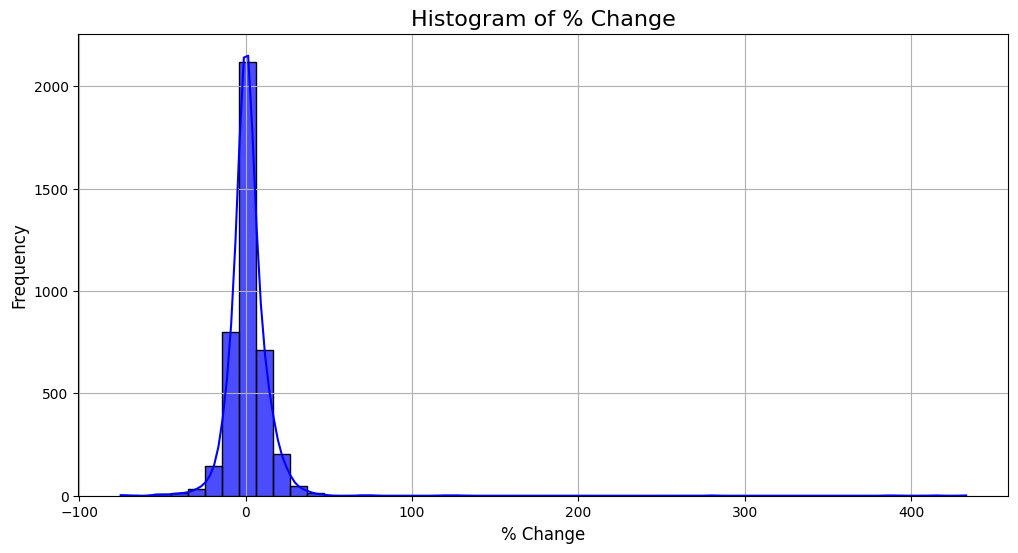

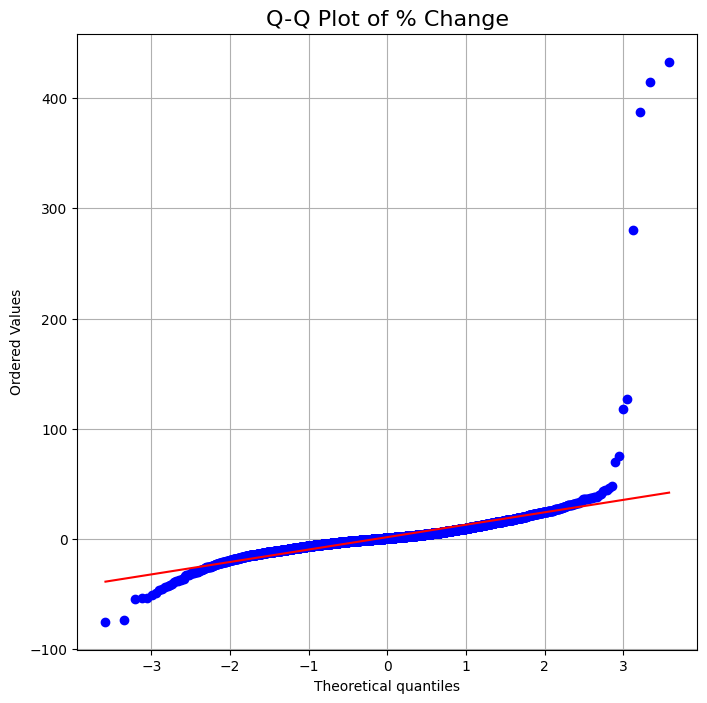

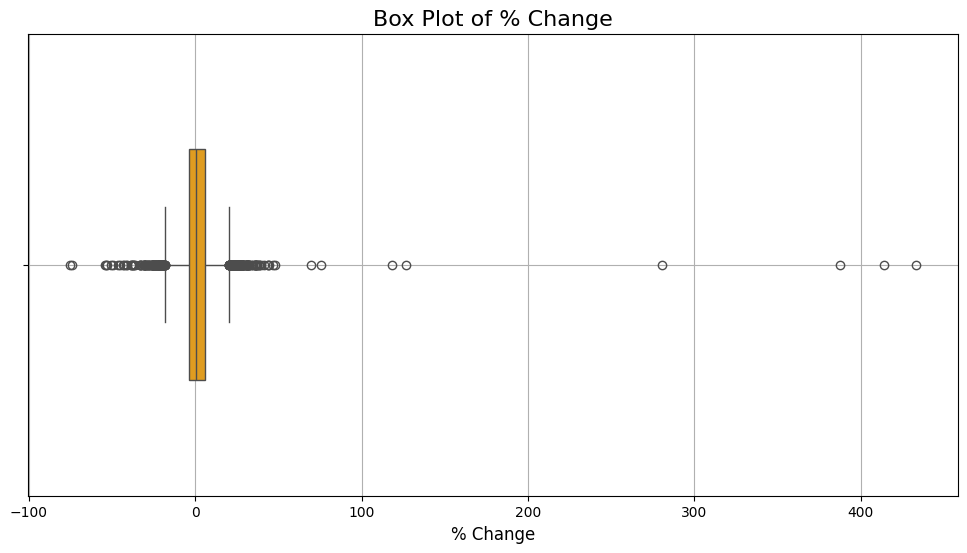

Lower Bound for Outliers: -18.22093825914128
Upper Bound for Outliers: 20.099138460649726
Number of Outliers: 272
Shapiro-Wilk Test Statistic: 0.5009, p-value: 0.0000
The data does not appear to be normally distributed (reject H0).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Drop NaN values from the 'Pct_Change' column
btc_data = btc_data.dropna(subset=['Pct_Change'])

# Histogram to plot the distribution of 'Pct_Change'
plt.figure(figsize=(12, 6))
sns.histplot(btc_data['Pct_Change'], kde=True, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of % Change', fontsize=16)
plt.xlabel('% Change', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Q-Q Plot to visually check for normality
plt.figure(figsize=(8, 8))
probplot(btc_data['Pct_Change'], dist="norm", plot=plt)
plt.title('Q-Q Plot of % Change', fontsize=16)
plt.grid(True)
plt.show()

# Box Plot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=btc_data['Pct_Change'], color='orange', width=0.5)
plt.title('Box Plot of % Change', fontsize=16)
plt.xlabel('% Change', fontsize=12)
plt.grid(True)
plt.show()

# Identify Outliers based on the IQR (Interquartile Range) method
Q1 = btc_data['Pct_Change'].quantile(0.25)  # First quartile
Q3 = btc_data['Pct_Change'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1.5 * IQR  # Lower bound
upper_bound = Q3 + 1.5 * IQR  # Upper bound

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Filter outliers
outliers = btc_data[(btc_data['Pct_Change'] < lower_bound) | (btc_data['Pct_Change'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

# Shapiro-Wilk Test for normality
stat, p_value = shapiro(btc_data['Pct_Change'])
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Interpretation of the Shapiro-Wilk test result
if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

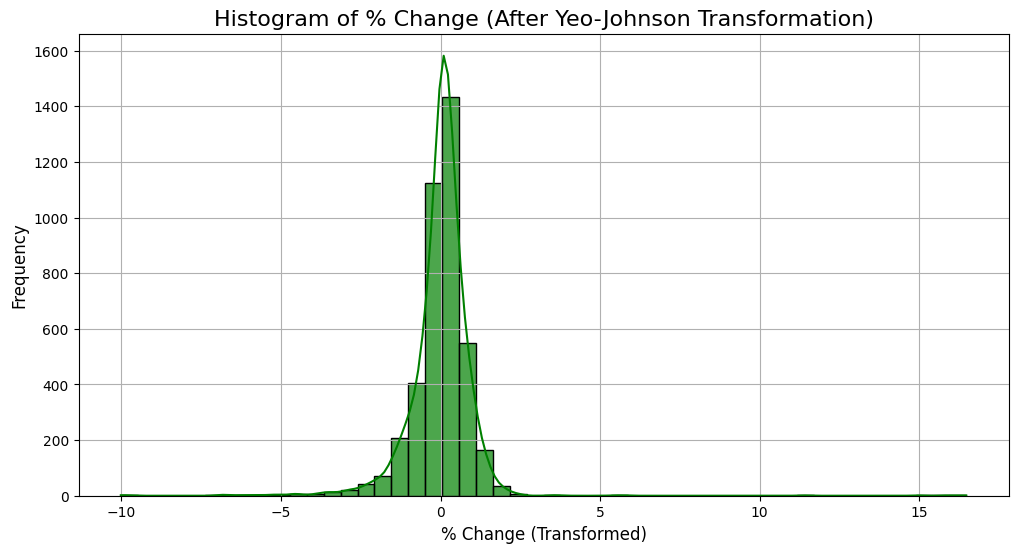

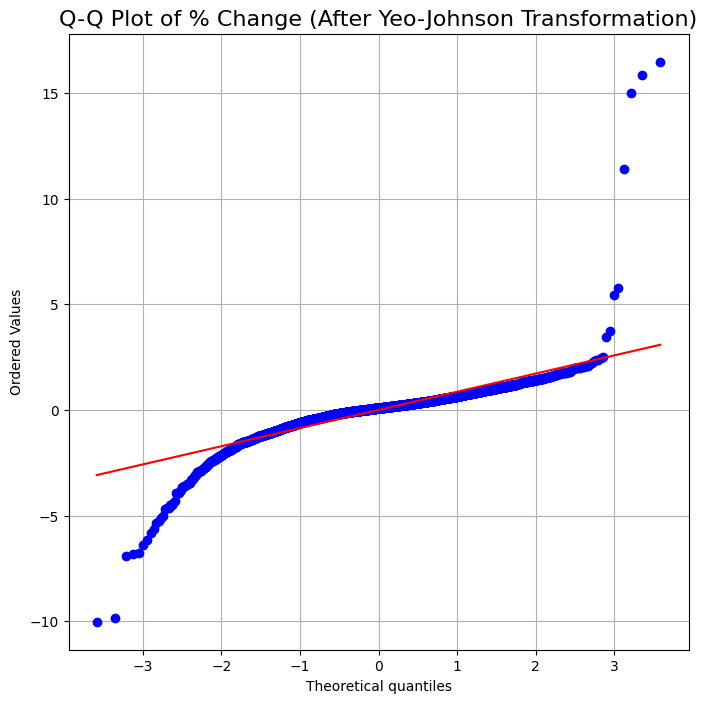

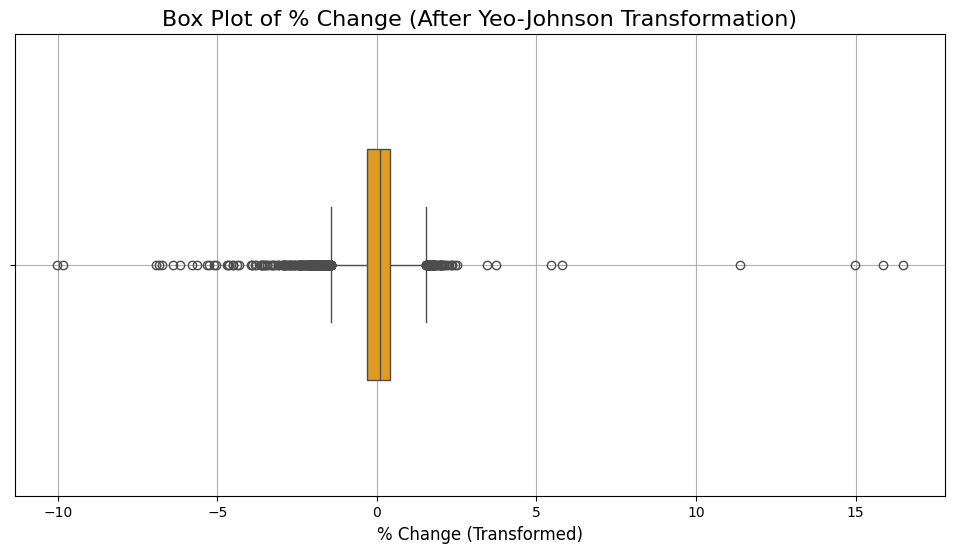

Shapiro-Wilk Test Statistic: 0.7413, p-value: 0.0000
Lower Bound for Outliers (Transformed): -1.428131344460079
Upper Bound for Outliers (Transformed): 1.5346348058134307
Number of Outliers (Transformed Data): 281


In [ ]:
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, shapiro

# Initialize the Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
btc_data['Pct_Change_YJ'] = pt.fit_transform(btc_data[['Pct_Change']])

# Plot the transformed data (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(btc_data['Pct_Change_YJ'], kde=True, bins=50, color='green', alpha=0.7)
plt.title('Histogram of % Change (After Yeo-Johnson Transformation)', fontsize=16)
plt.xlabel('% Change (Transformed)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Q-Q Plot for transformed data
plt.figure(figsize=(8, 8))
probplot(btc_data['Pct_Change_YJ'], dist="norm", plot=plt)
plt.title('Q-Q Plot of % Change (After Yeo-Johnson Transformation)', fontsize=16)
plt.grid(True)
plt.show()

# Box Plot to visualize outliers after transformation
plt.figure(figsize=(12, 6))
sns.boxplot(x=btc_data['Pct_Change_YJ'], color='orange', width=0.5)
plt.title('Box Plot of % Change (After Yeo-Johnson Transformation)', fontsize=16)
plt.xlabel('% Change (Transformed)', fontsize=12)
plt.grid(True)
plt.show()

# Run Shapiro-Wilk test for normality on transformed data
stat, p_value = shapiro(btc_data['Pct_Change_YJ'])
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Detect Outliers using the IQR method on the transformed data
Q1 = btc_data['Pct_Change_YJ'].quantile(0.25)  # First quartile
Q3 = btc_data['Pct_Change_YJ'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1.5 * IQR  # Lower bound
upper_bound = Q3 + 1.5 * IQR  # Upper bound

# Print the bounds for outliers
print(f"Lower Bound for Outliers (Transformed): {lower_bound}")
print(f"Upper Bound for Outliers (Transformed): {upper_bound}")

# Filter outliers
outliers = btc_data[(btc_data['Pct_Change_YJ'] < lower_bound) | (btc_data['Pct_Change_YJ'] > upper_bound)]
print(f"Number of Outliers (Transformed Data): {len(outliers)}")

# Optionally, cap or remove outliers
# Cap outliers (Winsorization)
btc_data['Pct_Change_YJ_Capped'] = btc_data['Pct_Change_YJ'].clip(lower=lower_bound, upper=upper_bound)

# Remove outliers
btc_data_no_outliers = btc_data[(btc_data['Pct_Change_YJ'] >= lower_bound) & (btc_data['Pct_Change_YJ'] <= upper_bound)]